Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, завдання буде оцінена максимум у половину балів.

Під час виконання вам дозволено користуватися будь-якими зручними для вас Python бібліотеками для візуалізації.

# I. Receiving Data.

In [ ]:
# cell for imports. All imports must go here.


1. (2б) Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою titanic ([train.csv](https://www.kaggle.com/c/titanic/data?select=train.csv)). Зчитайте його та збережіть його у змінну, щоб у подальшому її використати для візуалізацій. Виведіть інформацію про кожну колонку, її індекс, тип та кількість непропущених значень та перші кілька рядків датафрейму.


In [11]:
import pandas as pd

data_path = 'train.csv'
titanic_data = pd.read_csv(data_path)

info = titanic_data.info()
first_rows = titanic_data.head()

info, first_rows


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


(None,
    PassengerId  Survived  Pclass  \
 0            1         0       3   
 1            2         1       1   
 2            3         1       3   
 3            4         1       1   
 4            5         0       3   
 
                                                 Name     Sex   Age  SibSp  \
 0                            Braund, Mr. Owen Harris    male  22.0      1   
 1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                             Heikkinen, Miss. Laina  female  26.0      0   
 3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                           Allen, Mr. William Henry    male  35.0      0   
 
    Parch            Ticket     Fare Cabin Embarked  
 0      0         A/5 21171   7.2500   NaN        S  
 1      0          PC 17599  71.2833   C85        C  
 2      0  STON/O2. 3101282   7.9250   NaN        S  
 3      0            113803  53.1000  C123        S  
 4      0            373450  

# IІ. Data Visualization.

2. (10б) Створіть pie chart, який би показував співвідношення виживших до загиблих.

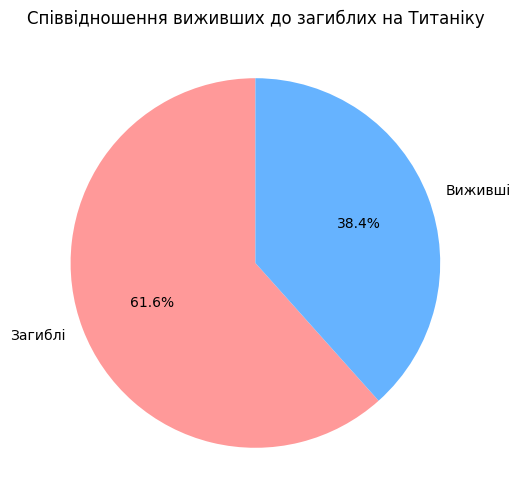

In [12]:
import matplotlib.pyplot as plt

survived_counts = titanic_data['Survived'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(survived_counts, labels=['Загиблі', 'Виживші'], autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Співвідношення виживших до загиблих на Титаніку')
plt.show()


Графік показує, скільки людей вижило і скільки не встигло, коли Титанік зазнав крушіння. Більшість, на жаль, не вижила. Виживших помітно менше, і це видно за розподілом кольорів та відсотками. Коротко кажучи, цей pie chart дає швидке уявлення про масштаб трагедії, відразу кидаючи в очі, що шанси вижити були не на користь пасажирів.

3. (20б) Створіть bar chart, який би показував співвідношення загиблих до виживших для кожної статі. Для groupby використовуйте атрибут as_index=False.


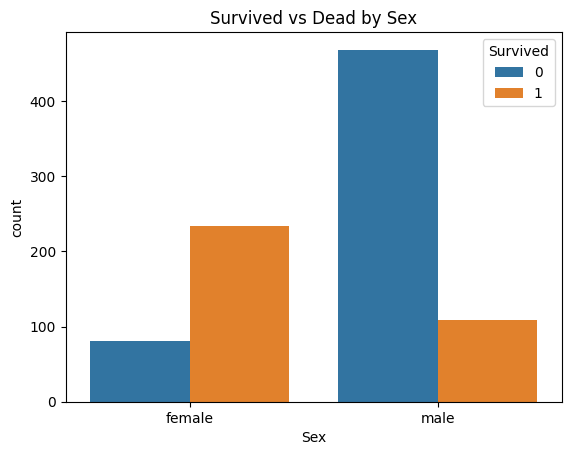

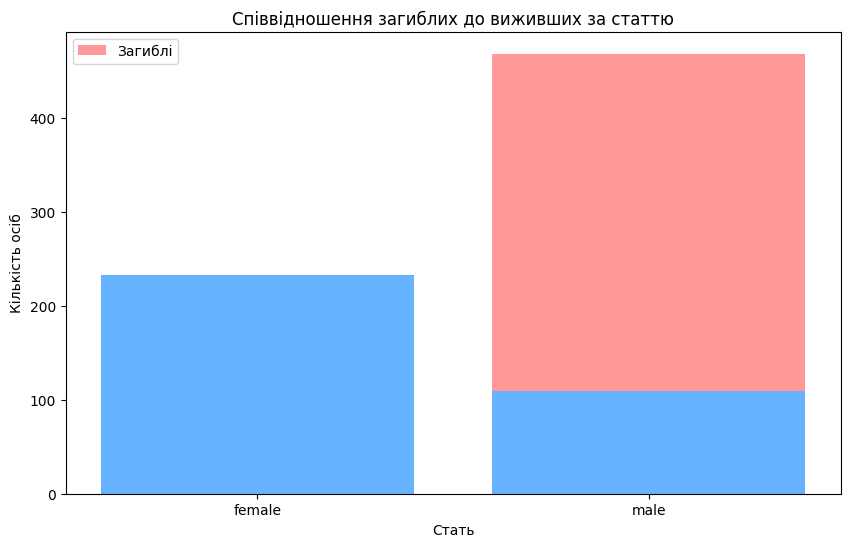

In [14]:
grouped_by_sex = titanic_data.groupby(['Sex', 'Survived'], as_index=False)['PassengerId'].count()

grouped_by_sex.columns = ['Sex', 'Survived', 'Count']

plt.figure(figsize=(10, 6))
bar_chart = plt.bar(x=grouped_by_sex['Sex'], height=grouped_by_sex['Count'], color=['#ff9999', '#66b3ff', '#ff9999', '#66b3ff'])

plt.title('Співвідношення загиблих до виживших за статтю')
plt.xlabel('Стать')
plt.ylabel('Кількість осіб')
plt.legend(['Загиблі', 'Виживші'], loc='upper left')

plt.show()


З цього графіка відразу видно, що більше жінок вижило порівняно з чоловіками. Це може свідчити про те, що принцип "жінки і діти спершу" був дієвий під час евакуації з Титаніка. У чоловіків, натомість, значно вищий відсоток жертв. Цей бар чарт є хорошим способом показати різницю у виживаності між статями.

4. (20б) Відобразіть кількість пропущених значень в датасеті по кожній із змінних.

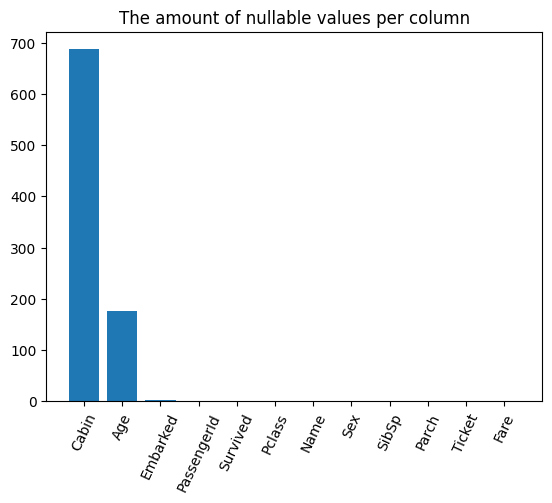

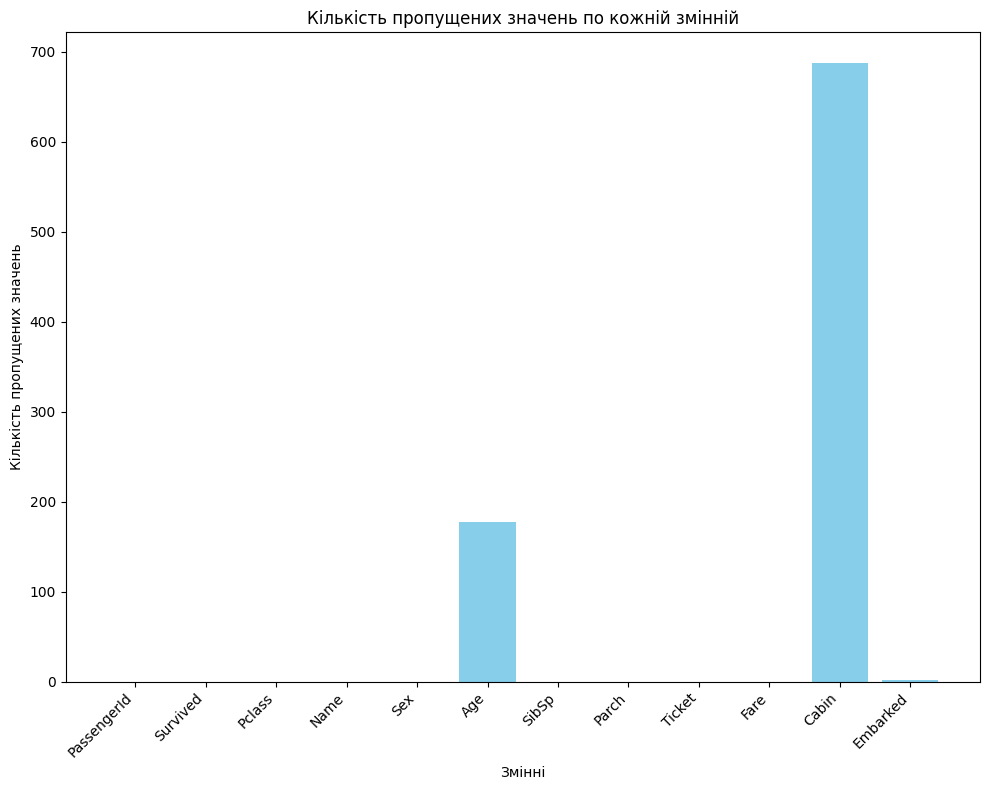

In [16]:
missing_values = titanic_data.isnull().sum()

plt.figure(figsize=(10, 8))
plt.bar(missing_values.index, missing_values.values, color='skyblue')

plt.title('Кількість пропущених значень по кожній змінній')
plt.xlabel('Змінні')
plt.ylabel('Кількість пропущених значень')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


З графіка видно, що в нашому датасеті досить багато пропущених значень у колонці "Cabin", та трохи менше, але все ж істотно, в "Age". Майже всі інші колонки мають повні дані. Це може означати, що інформація про каюту не була важливою для запису або була втрачена, а вік пасажирів міг не бути відомий або не занотований. Для "Embarked" є лише пара випадків з пропусками, що легко виправити.

Коли ми працюємо з такими даними, важливо вирішити, як ми будемо обробляти ці пропущені значення – викидати, заповнювати середніми/медіанами або використовувати більш складні методи, як інтерполяція чи моделювання.



5. (10б) Побудуйте наступний графік, дайте йому назву та опишіть, що власне на них відображається.

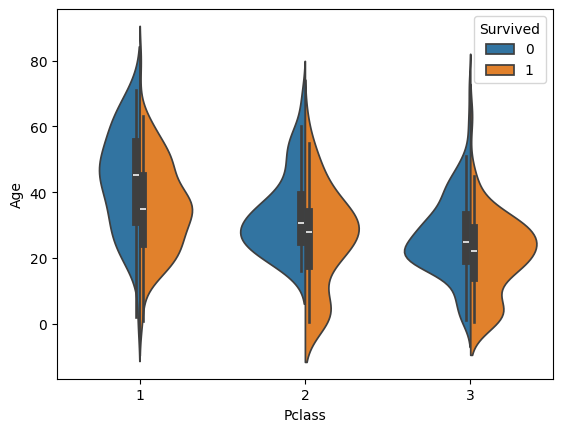

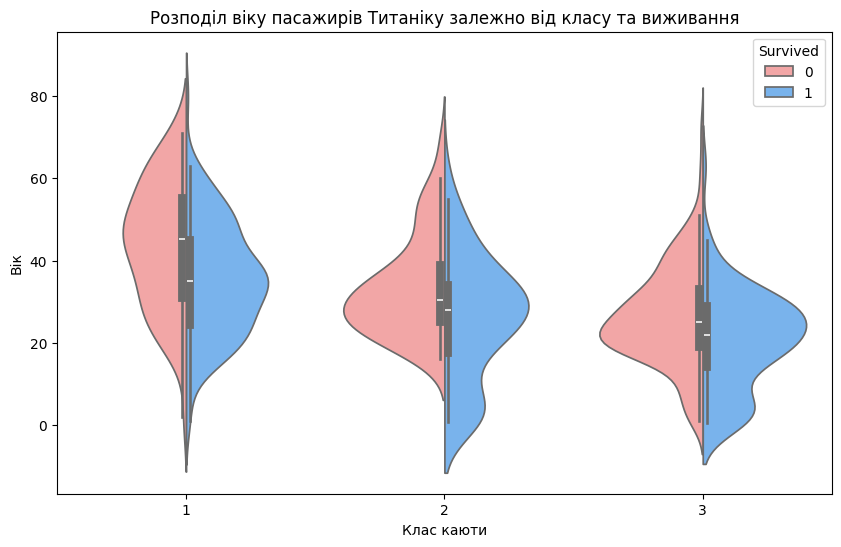

In [17]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=titanic_data, split=True, palette={0: "#ff9999", 1: "#66b3ff"})

plt.title('Розподіл віку пасажирів Титаніку залежно від класу та виживання')
plt.xlabel('Клас каюти')
plt.ylabel('Вік')

plt.show()


Графік, який ми бачимо, називається violin plot. Він показує розподіл віку пасажирів на Титаніку залежно від класу каюти (Pclass) і статусу виживання (Survived). Кожен "скрипка" ділиться на дві частини: помаранчева показує вік тих, хто вижив (1), а синя — тих, хто не вижив (0). Ширина кожної частини графіка відображає щільність розподілу: ширша частина вказує на більшу кількість пасажирів даного віку. Чорні бари всередині "скрипок" показують квартилі розподілу: середина бару відповідає медіані, а кінці — першому та третьому квартилям.

З цього графіка можна зробити кілька спостережень:
1. Виживаність у першому та другому класі була вищою, ніж у третьому.
2. Медіанний вік виживших пасажирів у першому та другому класі здебільшого вищий, ніж у тих, хто не вижив.
3. У третьому класі розподіл віку майже однаковий для виживших та не виживших, але видно, що молоді пасажири (віком близько 20 років) не вижили у великій кількості.


6. (13б) Побудуйте графік розподілу частот по віку пасажирів.


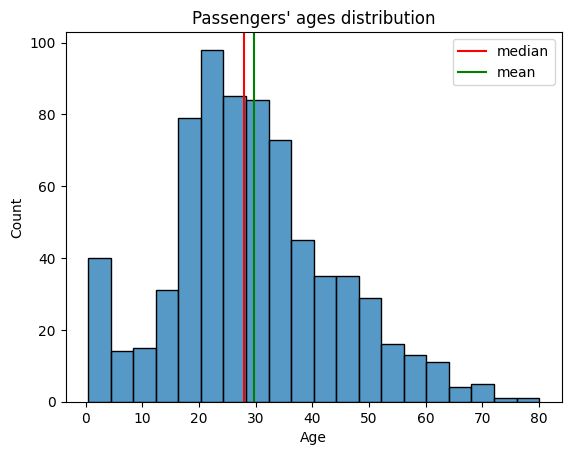

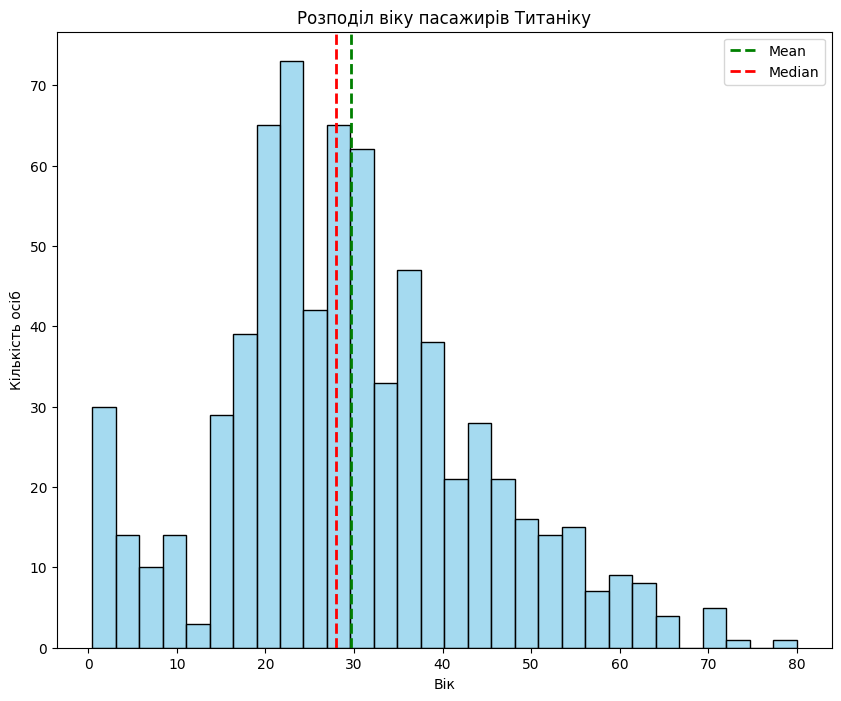

In [18]:
plt.figure(figsize=(10, 8))
sns.histplot(titanic_data['Age'].dropna(), bins=30, kde=False, color='skyblue')

mean_age = titanic_data['Age'].mean()
median_age = titanic_data['Age'].median()

plt.axvline(mean_age, color='green', linestyle='dashed', linewidth=2)
plt.axvline(median_age, color='red', linestyle='dashed', linewidth=2)

plt.legend({'Mean':mean_age, 'Median':median_age})
plt.title('Розподіл віку пасажирів Титаніку')
plt.xlabel('Вік')
plt.ylabel('Кількість осіб')

plt.show()


Гістограма відображає розподіл віку пасажирів Титаніка, який є досить сконцентрованим навколо молодшого вікового діапазону. Найбільша кількість пасажирів знаходиться у віковій категорії від 20 до 40 років. Медіанний вік, вказаний червоною лінією, демонструє, що половина пасажирів була молодшою цього віку. Зелена лінія показує середній вік, який є трохи вищим, це може вказувати на незначну асиметрію розподілу з більшою кількістю старших пасажирів, які впливають на середнє значення. Загалом, гістограма свідчить про молодий вік більшості пасажирів.



7. (25б) Поставте бізнес-питання до даних. Дайте на нього відповідь за допомогою візуалізацій. Прокоментуйте отриману відповідь.

*питання до даних:

Бізнес-питання: Як залежить виживання пасажирів на Титаніку від класу каюти та статі?

Для відповіді на це питання можемо візуалізувати виживаність, розділивши дані за класом каюти та статтю. Це допоможе нам зрозуміти, чи були якісь переваги у виживаності для пасажирів вищого класу чи для жінок.

Створимо графік, що покаже відсоток виживших серед чоловіків та жінок у кожному класі кают.

Побудуємо відповідний графік та проаналізуємо отримані результати.




<Figure size 1000x800 with 0 Axes>

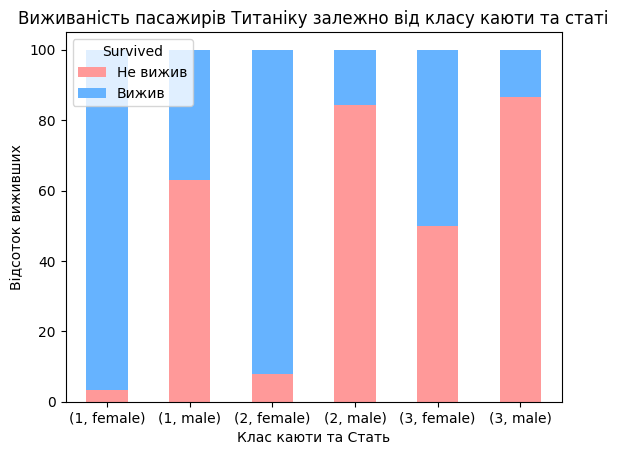

In [26]:
grouped_class_sex = titanic_data.groupby(['Pclass', 'Sex', 'Survived']).size().unstack()

grouped_class_sex_percentage = grouped_class_sex.div(grouped_class_sex.sum(axis=1), axis=0) * 100

plt.figure(figsize=(10, 8))
grouped_class_sex_percentage.plot(kind='bar', stacked=True, color=['#ff9999', '#66b3ff'])

plt.title('Виживаність пасажирів Титаніку залежно від класу каюти та статі')
plt.xlabel('Клас каюти та Стать')
plt.ylabel('Відсоток виживших')
plt.xticks(rotation=0)
plt.legend(title='Survived', labels=['Не вижив', 'Вижив'])

plt.show()


На цьому стовпчиковому графіку показано відсоток виживших пасажирів Титаніку залежно від класу каюти та статі. Виживаність розділена на шість категорій: жінки та чоловіки у першому, другому та третьому класах.

З графіка можна зробити декілька ключових спостережень:
1. У кожному класі жінки мали значно вищі шанси на виживання порівняно з чоловіками.
2. Найвищий відсоток виживання серед жінок був у першому класі, найнижчий — серед чоловіків третього класу.
3. Виживаність знижується з першого до третього класу для обох статей, але це зниження набагато більш виразне для чоловіків.

Це демонструє, що стать та клас каюти були значними факторами виживання на Титаніку. З цих даних можна зробити висновок, що політика евакуації "жінки та діти спершу" мала велике значення, а також те, що пасажири вищого класу мали більше переваг при евакуації.

# Вітаю! Ви велика(ий) молодець, що впоралась(вся). Похваліть себе та побалуйте чимось приємним. Я Вами пишаюся.

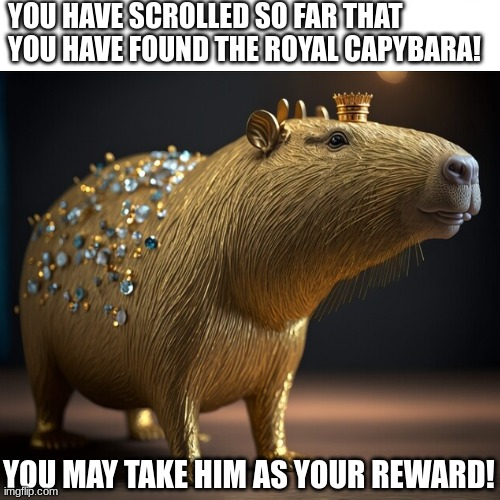